**Import Essential Lib**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import statsmodels.tsa.stattools as st

**Import Data File**

In [4]:
mydata_df = pd.read_csv("seasonal_trend.csv", header= 0, names=["year", "sales"], parse_dates= [0], index_col= 0)

In [5]:
mydata_df.head()

,sales
year,
1,203
2,486
3,438
4,816
5,835


In [6]:
mydata_ts = pd.Series(mydata_df["sales"].values, index= pd.date_range("30/01/2006", periods= 175, freq="M"))

In [7]:
mydata_ts.head()

2006-01-31    203
2006-02-28    486
2006-03-31    438
2006-04-30    816
2006-05-31    835
Freq: M, dtype: int64

In [9]:
mydata_ts

2006-01-31       203
2006-02-28       486
2006-03-31       438
2006-04-30       816
2006-05-31       835
               ...  
2020-03-31     67374
2020-04-30     81184
2020-05-31    117986
2020-06-30     43674
2020-07-31     49350
Freq: M, Length: 175, dtype: int64

Plotting the simple matplot

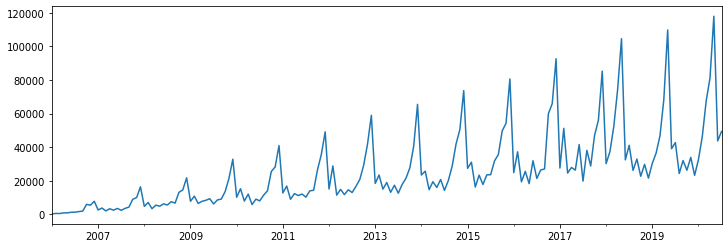

In [11]:
plt.figure(figsize=(12, 4))
mydata_ts.plot()

**Cumulative Sum for the data**

In [12]:
cumsum_mydatats = np.cumsum(mydata_ts)
cumsum_mydatats.head(10)

2006-01-31      203
2006-02-28      689
2006-03-31     1127
2006-04-30     1943
2006-05-31     2778
2006-06-30     3960
2006-07-31     5178
2006-08-31     6786
2006-09-30     8667
2006-10-31    14557
Freq: M, dtype: int64

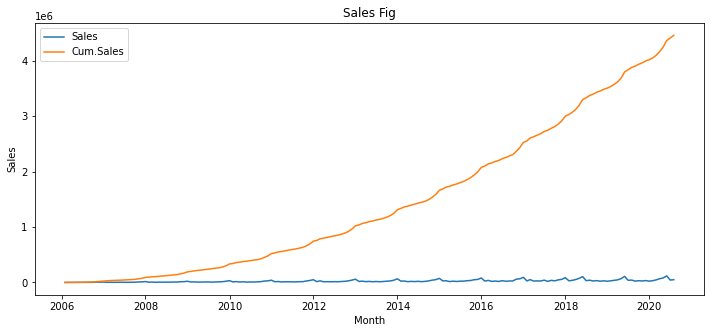

In [13]:
plt.figure(figsize=(12,5))
plt.plot(mydata_ts)
plt.plot(cumsum_mydatats)
plt.title("Sales Fig")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend(["Sales", "Cum.Sales"])
plt.show()

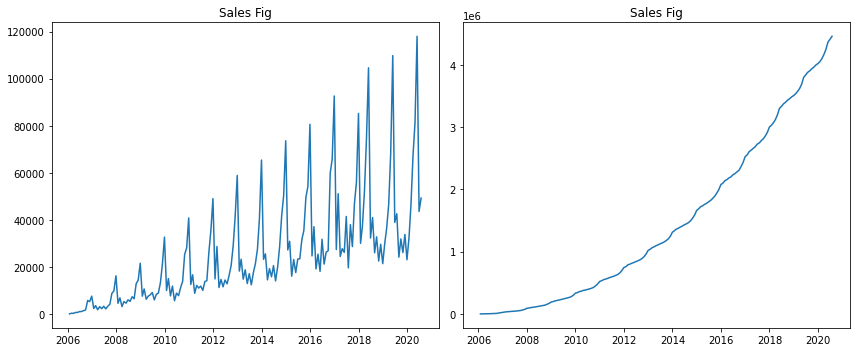

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(mydata_ts)
plt.title("Sales Fig")

plt.subplot(1, 2, 2)
plt.plot(cumsum_mydatats)
plt.title("Sales Fig")
plt.tight_layout()



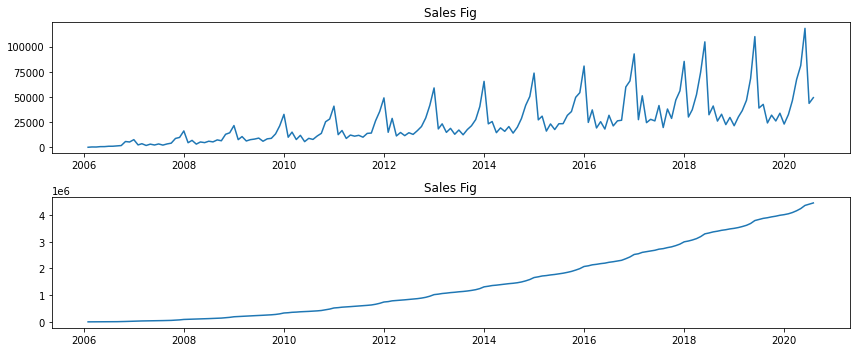

In [16]:
plt.figure(figsize=(12,5))
plt.subplot(2, 1, 1)
plt.plot(mydata_ts)
plt.title("Sales Fig")

plt.subplot(2, 1, 2)
plt.plot(cumsum_mydatats)
plt.title("Sales Fig")
plt.tight_layout()

**Rolling Window Average (OR) Simple Moving Avg.**

In [20]:
rol_mean = mydata_ts.rolling(5).mean()
rol_mean.head(10)

2006-01-31       NaN
2006-02-28       NaN
2006-03-31       NaN
2006-04-30       NaN
2006-05-31     555.6
2006-06-30     751.4
2006-07-31     897.8
2006-08-31    1131.8
2006-09-30    1344.8
2006-10-31    2355.8
Freq: M, dtype: float64

In [21]:
rol_std = mydata_ts.rolling(5).std()

In [22]:
rol_std.head(10)

2006-01-31            NaN
2006-02-28            NaN
2006-03-31            NaN
2006-04-30            NaN
2006-05-31     268.734627
2006-06-30     302.173460
2006-07-31     318.335044
2006-08-31     325.782443
2006-09-30     405.974999
2006-10-31    1996.722615
Freq: M, dtype: float64

**Define a function**

In [23]:
def plot_rolling(timeseries, window):
  rol_mean = timeseries.rolling(window).mean()
  rol_std = timeseries.rolling(window).std()

  plt.figure(figsize=(12,6))
  plt.plot(timeseries, color ="blue", label = "orginal")
  plt.plot(rol_mean, color ="red", label = "Rolling Mean")
  plt.plot(rol_std, color ="black", label = "Rolling STD")
  plt.legend(loc="best")
  plt.title("AAABBBCCC")
  plt.show()


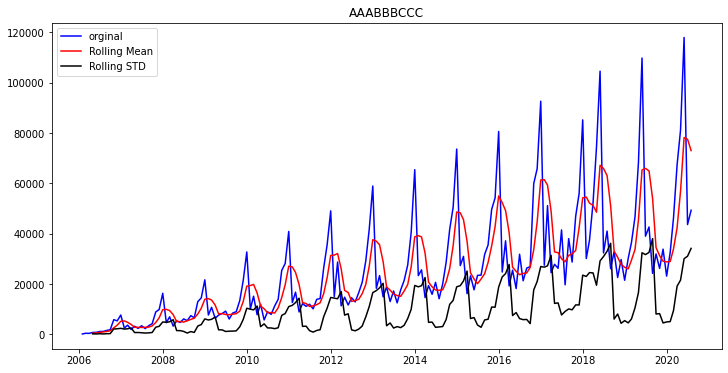

In [27]:
plot_rolling(mydata_ts, 4)

**EWMA**

In [31]:
def plot_ewma(timeseries, alpha):
  exm_ma = timeseries.ewm(alpha = alpha).mean()
  exm_std = timeseries.ewm(alpha = alpha).std()

  plt.figure(figsize=(12,6))
  plt.plot(timeseries, color ="blue", label = "orginal")
  plt.plot(exm_ma, color ="red", label = "Rolling Mean")
  plt.plot(exm_std, color ="black", label = "Rolling STD")
  plt.legend(loc="best")
  plt.title("AAABBBCCC")
  plt.show()

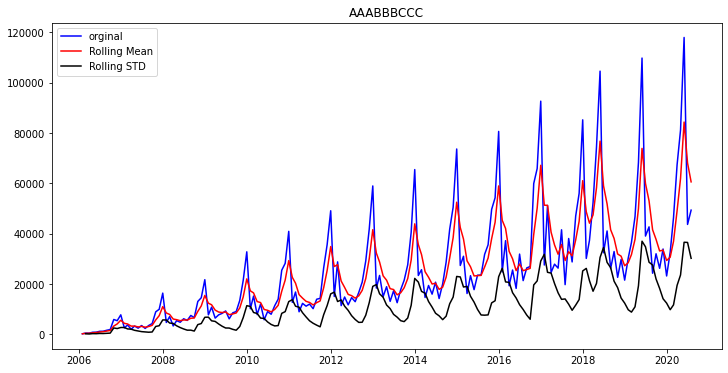

In [32]:
plot_ewma(mydata_ts, 0.4)

**Seasonal Decomposition od Financial Data**

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [34]:
decom_mydatats = seasonal_decompose(mydata_ts)

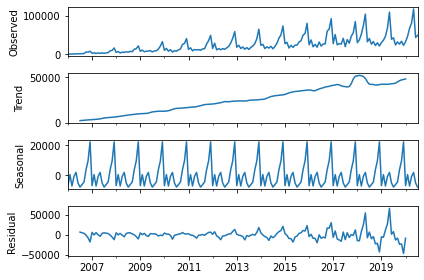

In [36]:
decom_plot = decom_mydatats.plot()

In [39]:
decom_trend_mydatats = decom_mydatats.trend
decom_seasonal_mydatats = decom_mydatats.seasonal
decom_resid_mydatats = decom_mydatats.resid

In [40]:
desea_mydatats= mydata_ts - decom_seasonal_mydatats
detrend_mydatats= mydata_ts - decom_trend_mydatats
deresid_mydatats= mydata_ts - decom_resid_mydatats

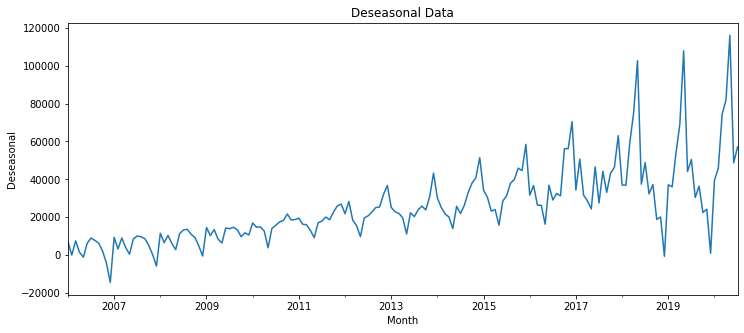

In [41]:
plt.figure(figsize=(12,5))
desea_mydatats.plot()

plt.title("Deseasonal Data")
plt.xlabel("Month")
plt.ylabel("Deseasonal")
plt.show()

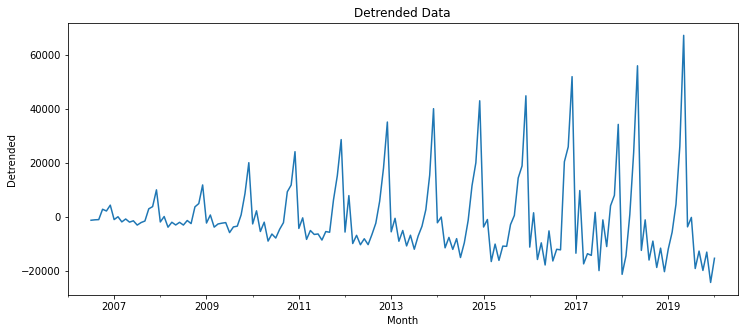

In [43]:
plt.figure(figsize=(12,5))
detrend_mydatats.plot()

plt.title("Detrended Data")
plt.xlabel("Month")
plt.ylabel("Detrended")
plt.show()

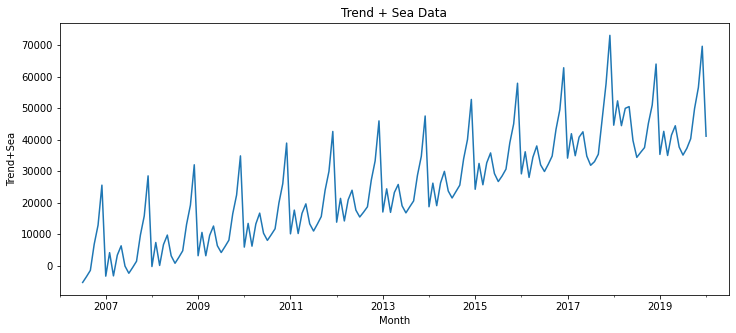

In [44]:
plt.figure(figsize=(12,5))
deresid_mydatats.plot()

plt.title("Trend + Sea Data")
plt.xlabel("Month")
plt.ylabel("Trend+Sea")
plt.show()

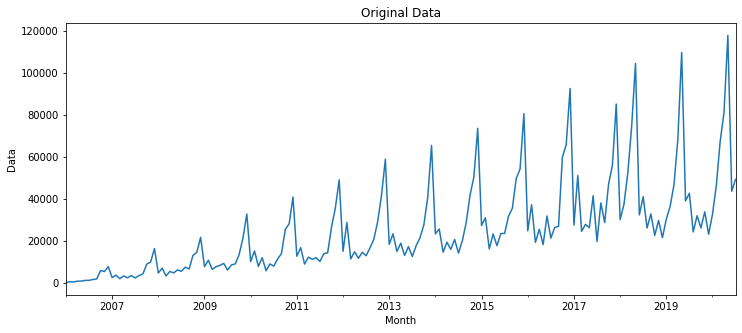

In [45]:
plt.figure(figsize=(12,5))
mydata_ts.plot()

plt.title("Original Data")
plt.xlabel("Month")
plt.ylabel("Data")
plt.show()

**STL Decomposition**

In [46]:
pip install stldecompose

In [47]:
from stldecompose import decompose

In [48]:
mydatats_stl = decompose(mydata_ts, period=12)

<Figure size 864x432 with 0 Axes>

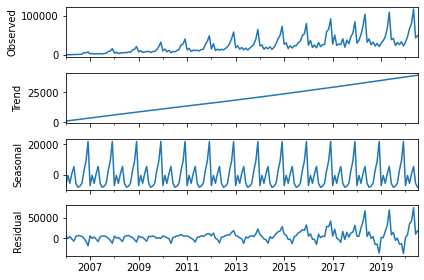

In [50]:
stl_plot = mydatats_stl.plot()


In [52]:
stl_trend_mydatats = mydatats_stl.trend
stl_seasonal_mydatats = mydatats_stl.seasonal
stl_resid_mydatats = mydatats_stl.resid

**Forecast Using the above data**

In [63]:
from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import (naive, drift, mean, seasonal_naive)

In [55]:
len(mydata_ts)

175

In [56]:
mydatats_f_mean = forecast(mydatats_stl, steps= 25, fc_func=mean, seasonal= True )

In [57]:
mydatats_f_mean.head(10)

,mean+seasonal
2020-08-31,33251.014663
2020-10-01,39700.628406
2020-11-01,44401.925169
2020-12-02,33270.735949
2021-01-02,30749.040612
2021-02-02,31507.439846
2021-03-05,33395.619477
2021-04-05,41767.030028
2021-05-06,48011.469841
2021-06-06,60801.391396


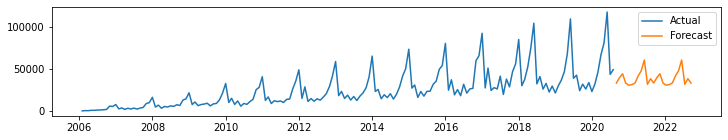

In [60]:
plt.figure(figsize=(12,2))
plt.plot(mydata_ts, label = "Actual")
plt.plot(mydatats_f_mean, label = "Forecast")
plt.legend()

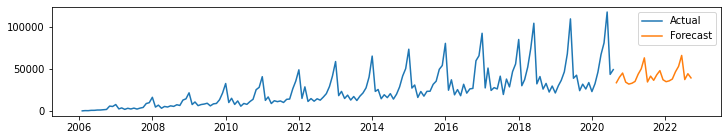

In [62]:
mydatats_f_drift = forecast(mydatats_stl, steps= 25, fc_func=drift, seasonal= True )
plt.figure(figsize=(12,2))
plt.plot(mydata_ts, label = "Actual")
plt.plot(mydatats_f_drift, label = "Forecast")
plt.legend()

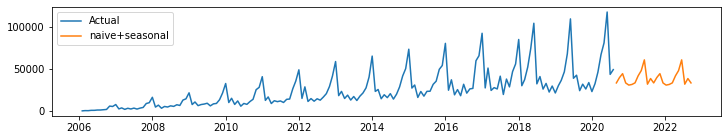

In [67]:
mydatats_f_drift = forecast(mydatats_stl, steps= 25, fc_func=naive, seasonal= True )
plt.figure(figsize=(12,2))
plt.plot(mydata_ts, label = "Actual")
plt.plot(mydatats_f_drift, label = mydatats_f_drift.columns[0])
plt.legend()

In [68]:
mydatats_f_drift.head()

,naive+seasonal
2020-08-31,33490.528239
2020-10-01,39860.333089
2020-11-01,44534.997922
2020-12-02,33448.166286
2021-01-02,30905.776537
